In [1]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt
path = '../../CodePass2/runs/'
path = "D:/"
with h5py.File(path + '/finale_normal.hdf5', 'r') as f:
    # read the data
    positions = f['x'][:]
    properties = f['properties'][:][0]
    p = f['p'][:]


In [41]:
# find sim movement vectors

sim_step_size = 500

sim_dirs = np.empty((positions.shape[0]-sim_step_size, positions.shape[1], 3))
sim_poss = np.empty((positions.shape[0]-sim_step_size, positions.shape[1], 3))  
for t in range(positions.shape[0]-sim_step_size):
    dir = positions[t+sim_step_size] - positions[t]
    dir = dir/np.linalg.norm(dir, axis = 1)[:,None]
    sim_dirs[t] = dir
    sim_poss[t] = positions[t]


In [5]:
sim_dirs.shape

(2801, 5000, 3)

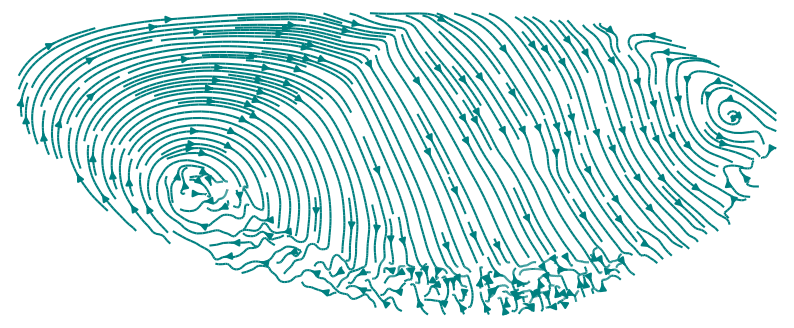

In [47]:

# make stream plot

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


fig = plt.figure(figsize = (10,4))

tp = 1600

hy = (sim_poss[tp,:,1]>0)*(properties != 2)
# Example scattered data
x = sim_poss[tp,hy,0]
y =  sim_poss[tp,hy,2]  # Y positions
dx = sim_dirs[tp,hy,0] # X motion components
dy = sim_dirs[tp,hy,2]  # Y motion components



# Define a regular grid for interpolation
grid_x, grid_y = np.meshgrid(
    np.linspace(min(x), max(x), 100),
    np.linspace(min(y), max(y), 100)
)

# Interpolate dx and dy onto the grid
grid_dx = griddata((x, y), dx, (grid_x, grid_y), method='cubic')
grid_dy = griddata((x, y), dy, (grid_x, grid_y), method='cubic')

# Create the stream plot
plt.streamplot(grid_x, grid_y, grid_dx, grid_dy, density = 3., color = "teal")

plt.axis('off')
# Show the plot
plt.show()